In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [3]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9574074074074074

In [4]:
svm = SVC()
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.9888888888888889

In [5]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9796296296296296

In [6]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3)

In [7]:
for train_index,test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index,test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [8]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [9]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

In [10]:
scores_l = []
scores_svm = []
scores_rf = []
for train_index,test_index in kf.split(digits.data):
    x_train,x_test,y_train,y_test = digits.data[train_index],digits.data[test_index],\
                                    digits.target[train_index],digits.target[test_index]
    scores_l.append(get_score(LogisticRegression(),x_train,x_test,y_train,y_test))
    scores_svm.append(get_score(SVC(),x_train,x_test,y_train,y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40),x_train,x_test,y_train,y_test))

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
cross_val_score(LogisticRegression(),digits.data,digits.target)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [13]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [14]:
df = pd.read_csv("data4.csv")

In [15]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['age','income']])
df['cluster'] = y_pred
df.head()

,name,age,income,cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


Text(0, 0.5, 'income')

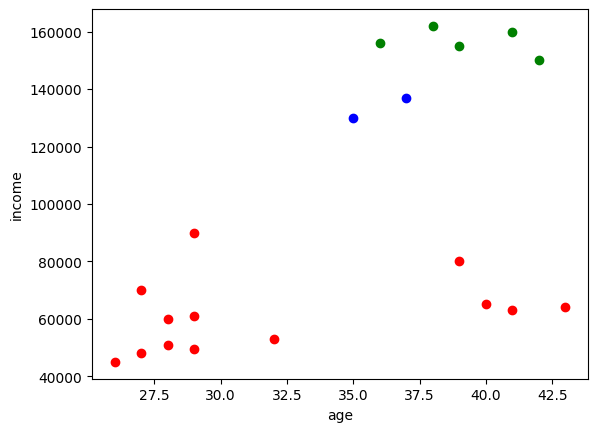

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['age'],df1['income'],color='green')
plt.scatter(df2['age'],df2['income'],color='red')
plt.scatter(df3['age'],df3['income'],color='blue')

plt.xlabel('age')
plt.ylabel('income')

In [18]:
scaler = MinMaxScaler()
scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])
scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])


In [19]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['age','income']])
df['cluster'] = y_pred

In [20]:
km.cluster_centers_

array([[0.86764706, 0.1965812 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

Text(0, 0.5, 'income')

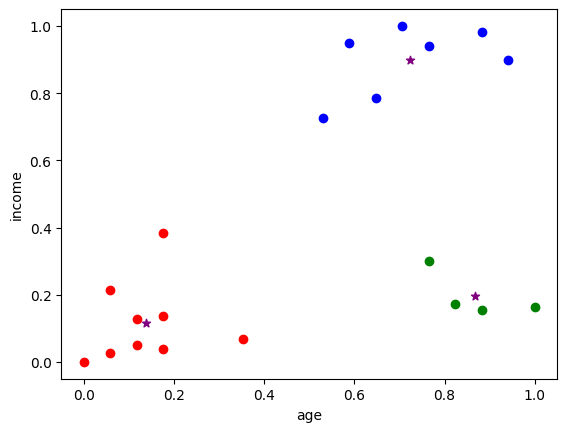

In [21]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['age'],df1['income'],color='green')
plt.scatter(df2['age'],df2['income'],color='red')
plt.scatter(df3['age'],df3['income'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('age')
plt.ylabel('income')

In [22]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['age','income']])
    sse.append(km.inertia_)

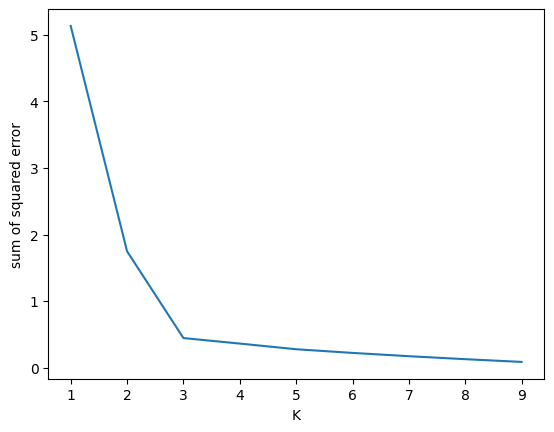

In [23]:
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)